In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
#### Import Data

In [3]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

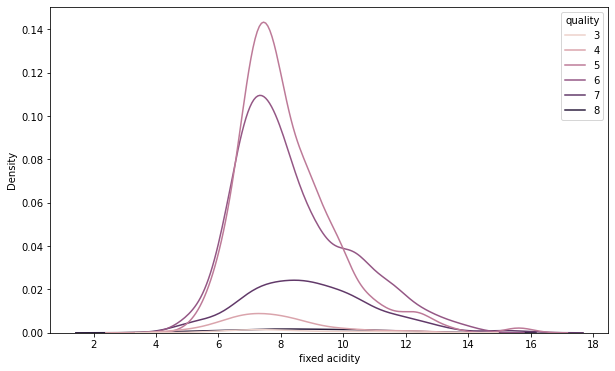

In [6]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['fixed acidity'], hue=df['quality'])
#Fixed Activity data follows the normal distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

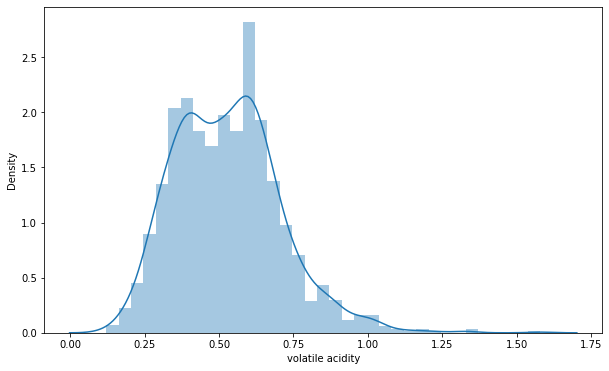

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(df['volatile acidity'])
#Volatile Acidity data follows the normal distribution.

In [8]:
df['citric acid'].value_counts()

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citric acid', ylabel='Density'>

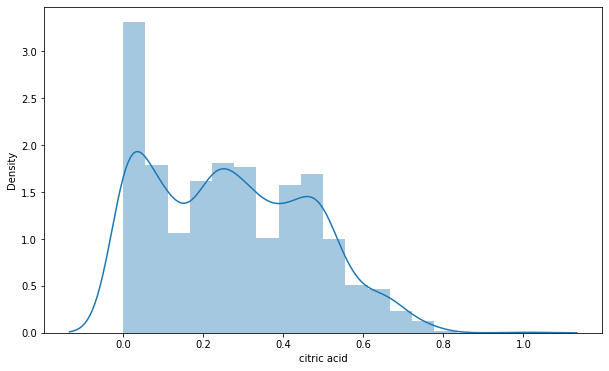

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['citric acid'])

In [10]:
df['residual sugar'].value_counts()

2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
3.45      1
2.85      1
7.00      1
5.40      1
7.30      1
Name: residual sugar, Length: 91, dtype: int64

In [11]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


**Observations:**
* Fixed acidity falls in same range for all quality level.
* Lower the volatile acidity level, higher the quality of wine.
* Higher the citric acid level, higher the quality of wine
* There is no significant difference in residual sugar value between different quality levels.
* Lower the chlorides level, higher the quality level of wine.
* There is relationship between free sulfur dioxide and total sulfur dioxide.
* Lower the pH value, higher the quality level of wine.
* Higher the sulphates level, quality level of wine increases.
* Alochol values falls in same range for all alcohol quality level.

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

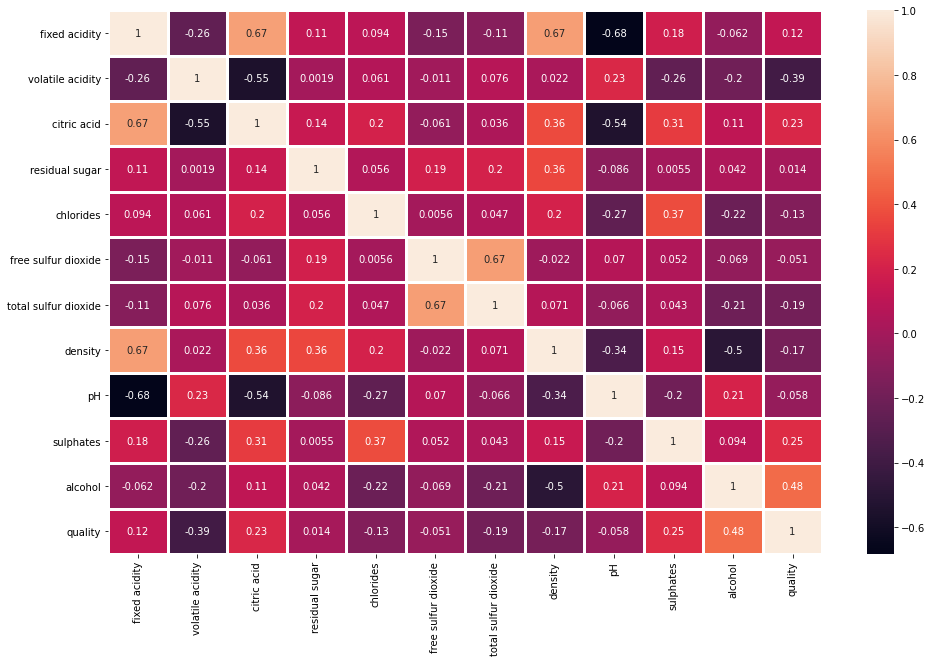

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(corr, linewidths=3, annot=True)

**Observation:**
* There is collinearity between multiple independent variable

### Scaling

In [15]:
sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df.drop('quality',axis=1)),columns=df.columns[:-1])

df_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


### Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['quality'], test_size=0.3, random_state=100)

In [17]:
y_train.value_counts()

5    477
6    445
7    140
4     36
8     14
3      7
Name: quality, dtype: int64

### Modelling

In [21]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))


def predictions(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
        model.fit(X_train, y_train)
        #predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])

### Logistic Regression

In [26]:
lg = LogisticRegression(multi_class='ovr')



In [32]:
predictions(lg)

----Train Metrics----
Confusion Matrix:
 [[  1   1   4   1   0   0]
 [  0   1  21  14   0   0]
 [  0   0 377 100   0   0]
 [  0   0 164 268  13   0]
 [  0   0  10  96  34   0]
 [  0   0   0   8   6   0]]


Accuracy Score:
 0.6085790884718498


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      0.14      0.25         7
           4       0.50      0.03      0.05        36
           5       0.65      0.79      0.72       477
           6       0.55      0.60      0.58       445
           7       0.64      0.24      0.35       140
           8       0.00      0.00      0.00        14

    accuracy                           0.61      1119
   macro avg       0.56      0.30      0.32      1119
weighted avg       0.60      0.61      0.58      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   0  10   5   2   0]
 [  0   0 151  51   2   0]
 [  0   0  58 125  10   0]
 [  0   0   3  43  13   0]
 [  0   0   0

### KNN

In [28]:
knn = KNeighborsClassifier()

In [31]:
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[  3   0   2   2   0   0]
 [  0   2  22  12   0   0]
 [  2   3 386  80   5   1]
 [  0   2 126 293  23   1]
 [  0   0  18  52  69   1]
 [  0   0   0   8   4   2]]


Accuracy Score:
 0.6747095621090259


Classification Report: 
               precision    recall  f1-score   support

           3       0.60      0.43      0.50         7
           4       0.29      0.06      0.09        36
           5       0.70      0.81      0.75       477
           6       0.66      0.66      0.66       445
           7       0.68      0.49      0.57       140
           8       0.40      0.14      0.21        14

    accuracy                           0.67      1119
   macro avg       0.55      0.43      0.46      1119
weighted avg       0.66      0.67      0.66      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   1  10   5   1   0]
 [  0   2 143  52   7   0]
 [  0   2  61 106  24   0]
 [  0   2   8  24  25   0]
 [  0   0   1

#### Naive Bayes

In [34]:
nb = GaussianNB()

predictions(nb)

----Train Metrics----
Confusion Matrix:
 [[  3   1   2   1   0   0]
 [  1   6  19  10   0   0]
 [  3  20 322 113  19   0]
 [  0  12 135 216  77   5]
 [  0   1   8  44  82   5]
 [  0   0   0   1  10   3]]


Accuracy Score:
 0.5647899910634495


Classification Report: 
               precision    recall  f1-score   support

           3       0.43      0.43      0.43         7
           4       0.15      0.17      0.16        36
           5       0.66      0.68      0.67       477
           6       0.56      0.49      0.52       445
           7       0.44      0.59      0.50       140
           8       0.23      0.21      0.22        14

    accuracy                           0.56      1119
   macro avg       0.41      0.43      0.42      1119
weighted avg       0.57      0.56      0.57      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   3   0   0   0]
 [  0   1   8   8   0   0]
 [  1   5 140  49   9   0]
 [  0   4  55  80  51   3]
 [  0   0   3  21  33   2]
 [  0   0   0

#### Decision Tree

In [35]:
dtree = DecisionTreeClassifier()

predictions(dtree)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  2   3   6   4   2   0]
 [  0   8 143  42  11   0]
 [  0   4  47 121  17   4]
 [  0   4   3  20  32   0]
 [  0   0   0   1   3   0]]


#### Bagging

In [36]:
bag = BaggingClassifier()

In [37]:
predictions(bag)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 476   1   0   0]
 [  0   0   6 439   0   0]
 [  0   0   1   5 134   0]
 [  0   0   0   0   1  13]]


Accuracy Score:
 0.9874888293118856


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       0.99      1.00      0.99       477
           6       0.99      0.99      0.99       445
           7       0.99      0.96      0.97       140
           8       1.00      0.93      0.96        14

    accuracy                           0.99      1119
   macro avg       0.99      0.98      0.99      1119
weighted avg       0.99      0.99      0.99      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   2  10   4   1   0]
 [  0   0 155  41   8   0]
 [  0   1  44 130  17   1]
 [  0   2   2  20  35   0]
 [  0   0   0

#### Random Forest

In [38]:
rf = RandomForestClassifier()

predictions(rf)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0   9   7   1   0]
 [  0   0 159  43   2   0]
 [  0   0  46 134  13   0]
 [  0   0   2  23  34   0]
 [  0   0   0   1   3   0]]


#### Gradient Boosting

In [39]:
gb = GradientBoostingClassifier()

predictions(gb)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  32   3   1   0   0]
 [  0   0 439  38   0   0]
 [  0   0  43 402   0   0]
 [  0   0   4  15 121   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 0.9070598748882931


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      0.89      0.94        36
           5       0.90      0.92      0.91       477
           6       0.88      0.90      0.89       445
           7       1.00      0.86      0.93       140
           8       1.00      1.00      1.00        14

    accuracy                           0.91      1119
   macro avg       0.96      0.93      0.94      1119
weighted avg       0.91      0.91      0.91      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  1   0   9   6   1   0]
 [  0   0 159  41   3   1]
 [  0   1  44 130  17   1]
 [  1   0   1  23  34   0]
 [  0   0   0

#### XG Boost

In [40]:
xgb = XGBClassifier()

predictions(xgb)

[16:25:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weigh

#### Light GBM

In [41]:
lgbm = LGBMClassifier()
predictions(lgbm)

----Train Metrics----
Confusion Matrix:
 [[  7   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 477   0   0   0]
 [  0   0   0 445   0   0]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0  14]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       477
           6       1.00      1.00      1.00       445
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00        14

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119

----Test Metrics----
Confusion Matrix:
 [[  0   0   2   1   0   0]
 [  0   0  11   5   1   0]
 [  0   0 163  37   4   0]
 [  0   0  46 131  16   0]
 [  0   0   2  23  33   1]
 [  0   0   0   1   3   0]]


#### CAT Boost

In [42]:
cat = CatBoostClassifier()

predictions(cat)

Learning rate set to 0.079582
0:	learn: 1.6972301	total: 74.6ms	remaining: 1m 14s
1:	learn: 1.6112290	total: 80.4ms	remaining: 40.1s
2:	learn: 1.5410415	total: 86ms	remaining: 28.6s
3:	learn: 1.4719395	total: 91.1ms	remaining: 22.7s
4:	learn: 1.4179346	total: 96.5ms	remaining: 19.2s
5:	learn: 1.3702955	total: 102ms	remaining: 16.9s
6:	learn: 1.3278748	total: 108ms	remaining: 15.3s
7:	learn: 1.2893719	total: 114ms	remaining: 14.1s
8:	learn: 1.2537906	total: 119ms	remaining: 13.1s
9:	learn: 1.2227351	total: 125ms	remaining: 12.3s
10:	learn: 1.1954155	total: 130ms	remaining: 11.7s
11:	learn: 1.1694083	total: 135ms	remaining: 11.1s
12:	learn: 1.1436114	total: 141ms	remaining: 10.7s
13:	learn: 1.1203926	total: 146ms	remaining: 10.3s
14:	learn: 1.1010801	total: 152ms	remaining: 9.96s
15:	learn: 1.0831619	total: 157ms	remaining: 9.67s
16:	learn: 1.0668867	total: 163ms	remaining: 9.45s
17:	learn: 1.0514032	total: 168ms	remaining: 9.19s
18:	learn: 1.0368780	total: 174ms	remaining: 8.98s
19:	lea